HOUSING PRICE


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#This applies the default Seaborn style, which includes settings related to colors, fonts, grid lines, and more.
%matplotlib inline
#To display Matplotlib plots directly within the notebook interface

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics

In [ ]:
df = pd.DataFrame(pd.read_csv('1_MLR_CF_Housing_Price.csv'))
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape

(545, 13)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique()
    print(unique_counts)

check_unquie_count(df)

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


In [ ]:
num_not_cat = df.select_dtypes(exclude='object')
num_not_cat.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
parking,int64


In [ ]:
# outlier check on all  independent feature except dependent variable

outlier_list = df[['area', 'bedrooms', 'bathrooms','stories','parking']]
outlier_list

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [ ]:
outlier_listC = list(outlier_list.columns)
outlier_listC

['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

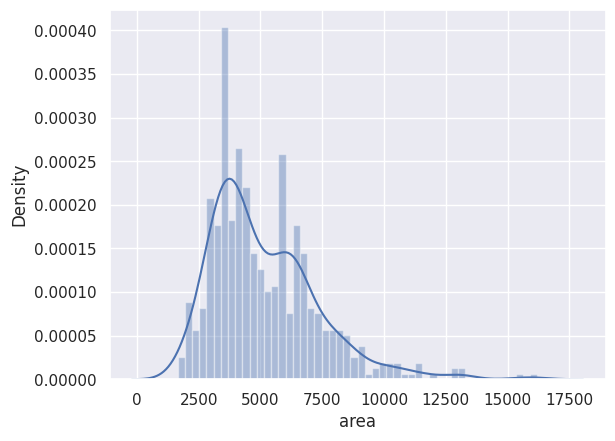

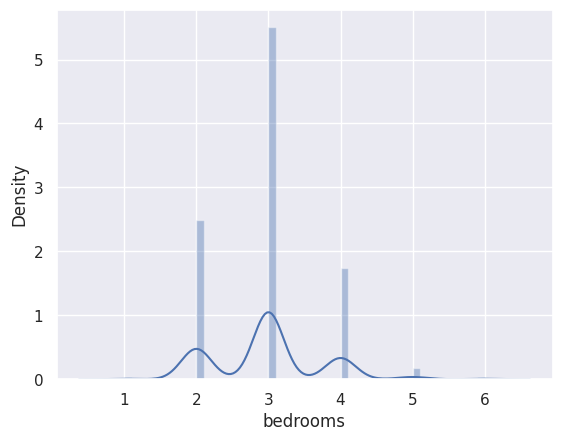

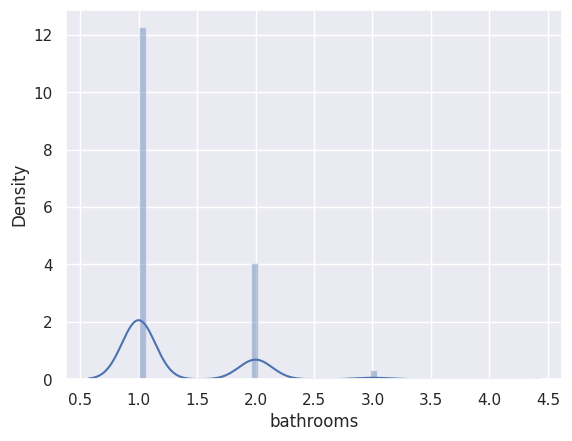

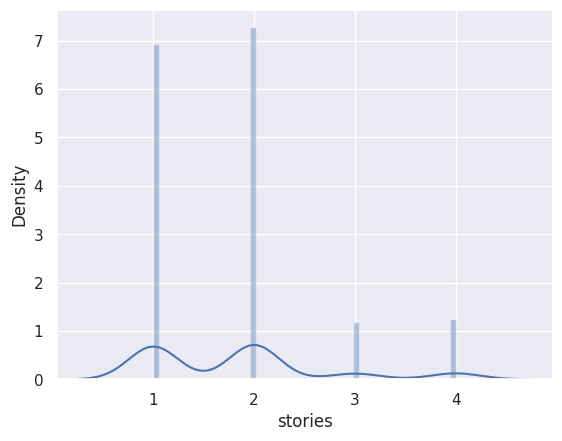

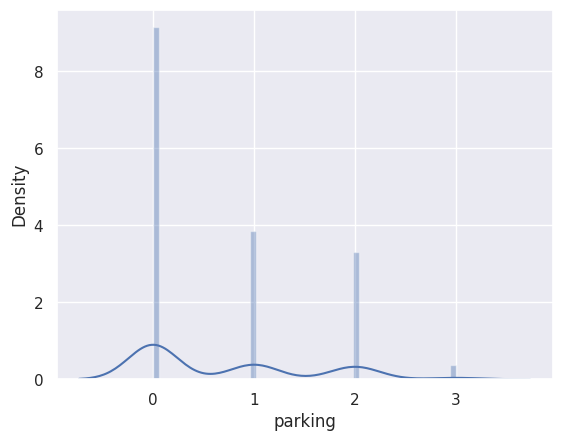

In [ ]:
def distplots(df,col):
    sns.distplot(df[col], bins=50,kde=True)
    plt.show()

for i in outlier_listC:
    distplots(outlier_list,i)

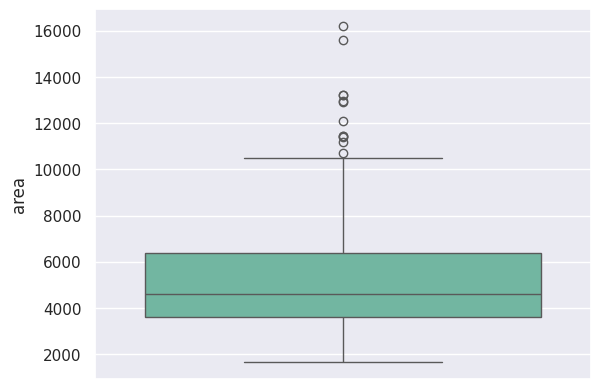

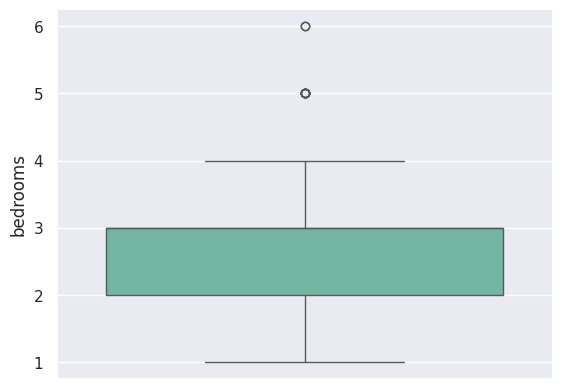

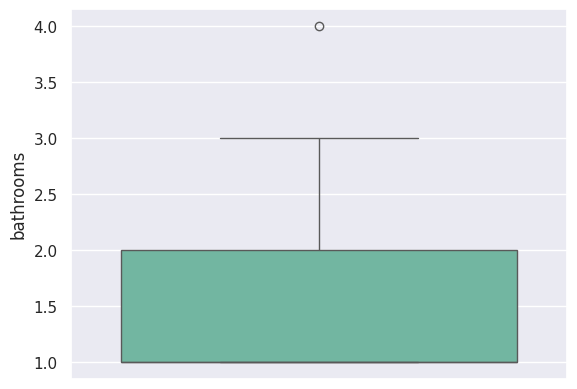

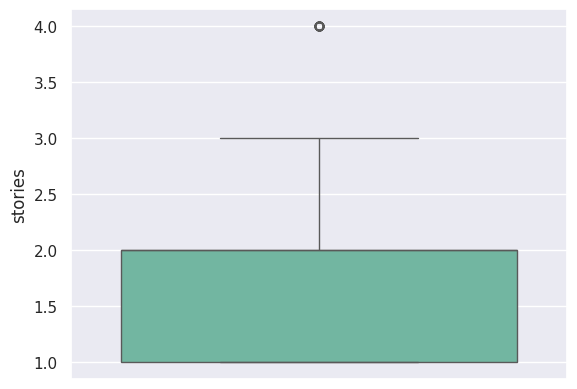

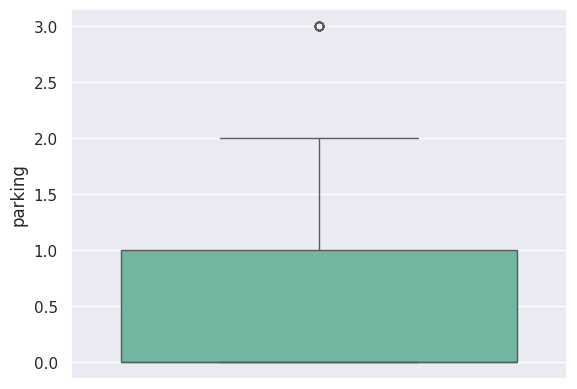

In [ ]:
def boxplots(df,col):
    sns.boxplot(y = col, data = df, palette ='Set2' )
    plt.show()

for col in outlier_listC:
        boxplots(df,col)

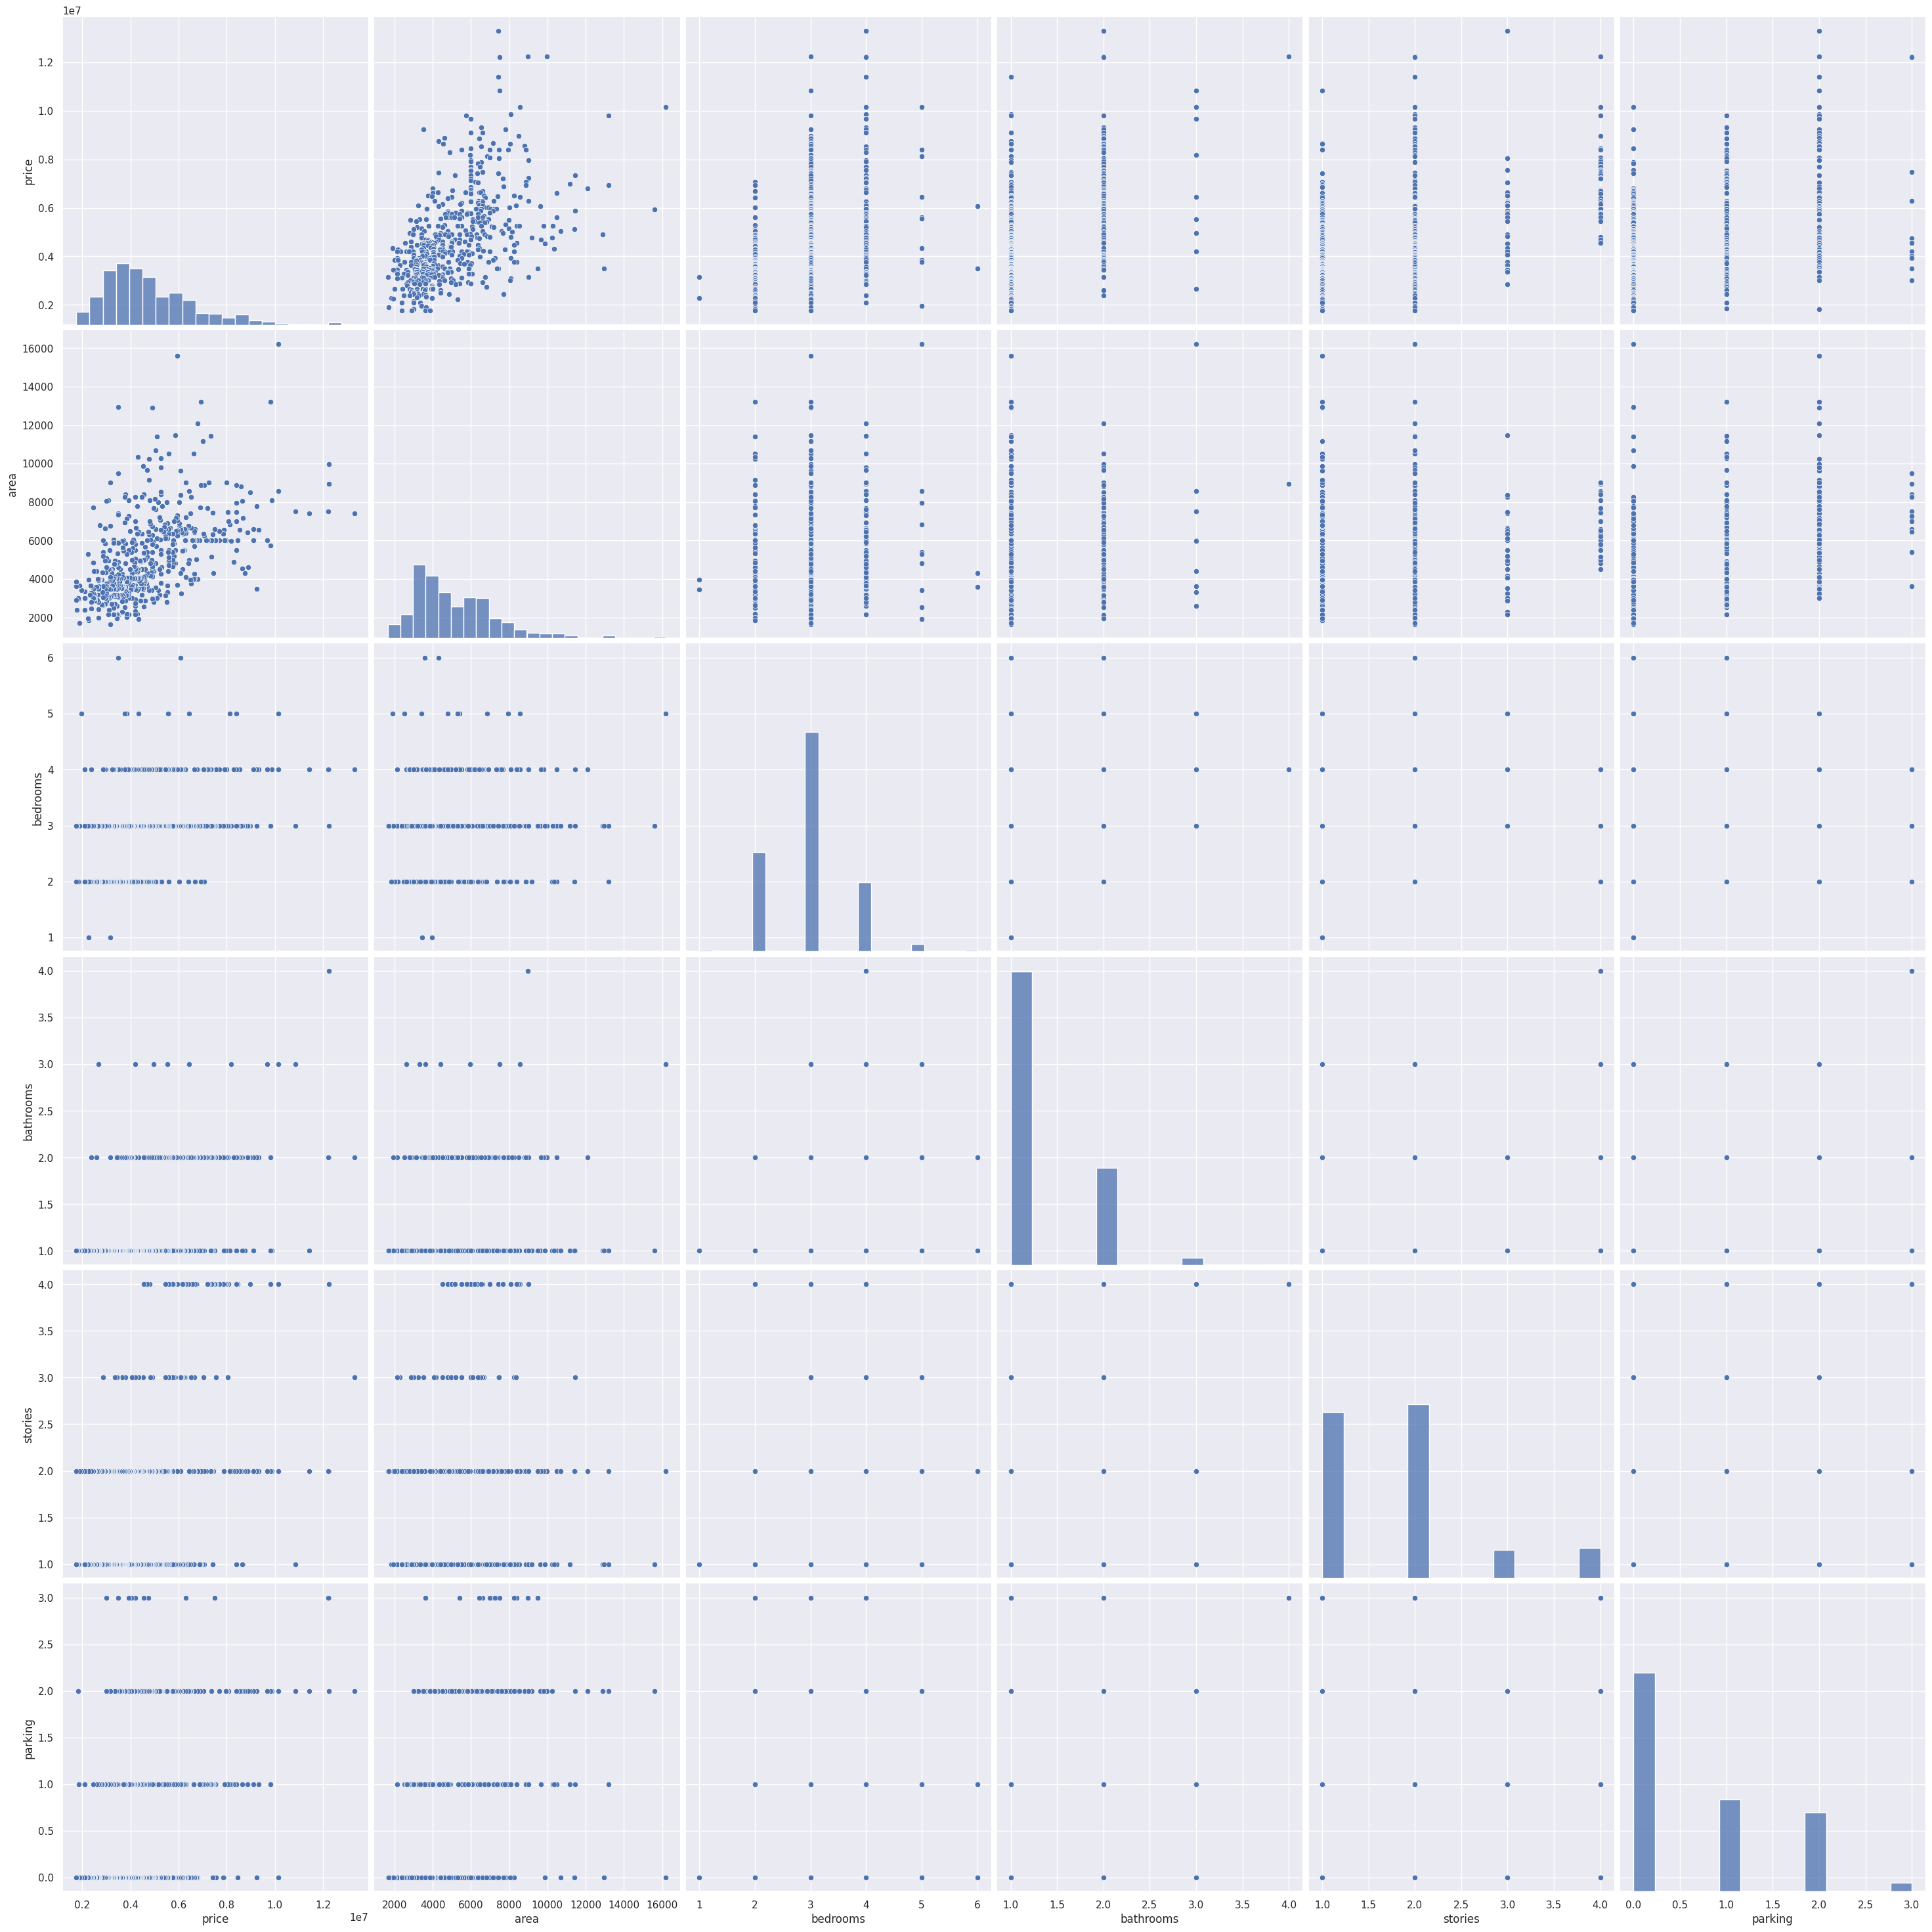

In [ ]:
sns.pairplot(df, size = 5, kind = 'scatter')

<Axes: xlabel='area', ylabel='price'>

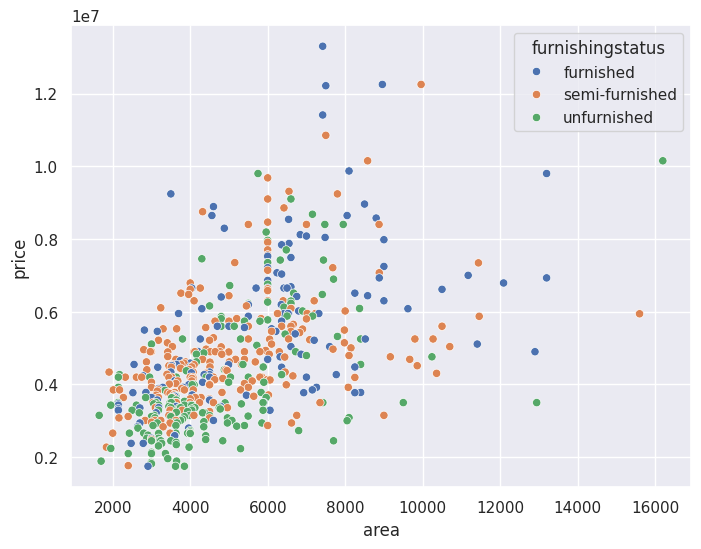

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['area'],y =df['price'],hue=df['furnishingstatus'] )

<Axes: xlabel='bedrooms', ylabel='price'>

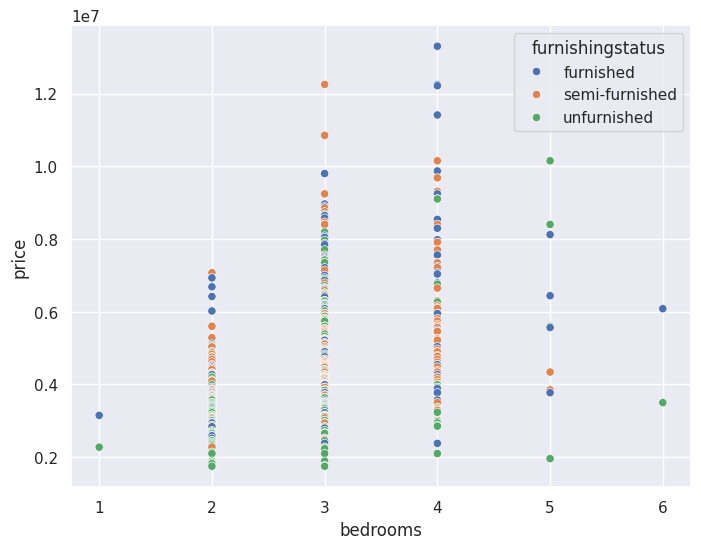

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['bedrooms'],y =df['price'],hue=df['furnishingstatus'] )

<Axes: xlabel='bathrooms', ylabel='price'>

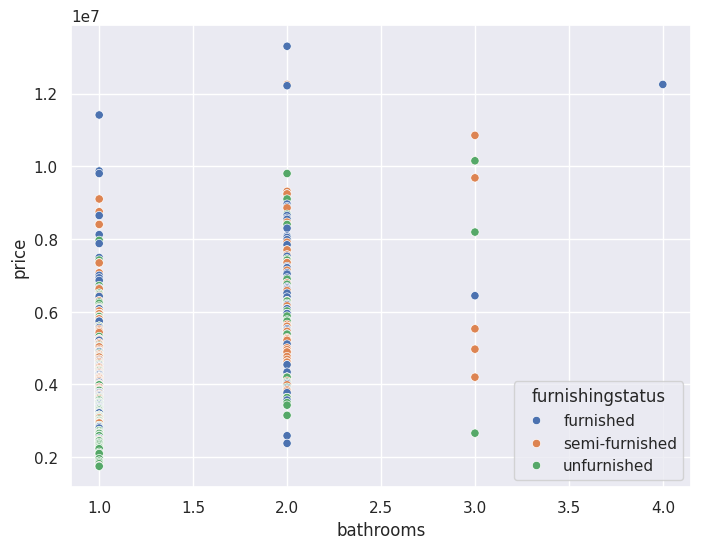

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['bathrooms'],y =df['price'],hue=df['furnishingstatus'] )

<Axes: xlabel='stories', ylabel='price'>

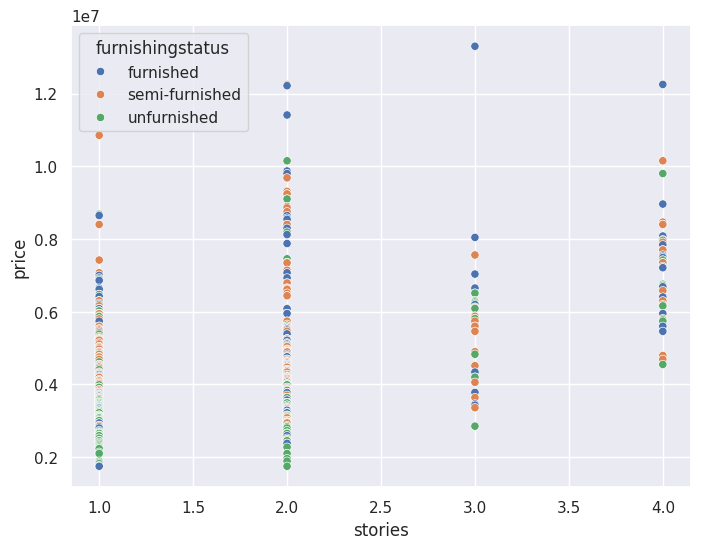

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['stories'],y =df['price'],hue=df['furnishingstatus'] )

<Axes: xlabel='parking', ylabel='price'>

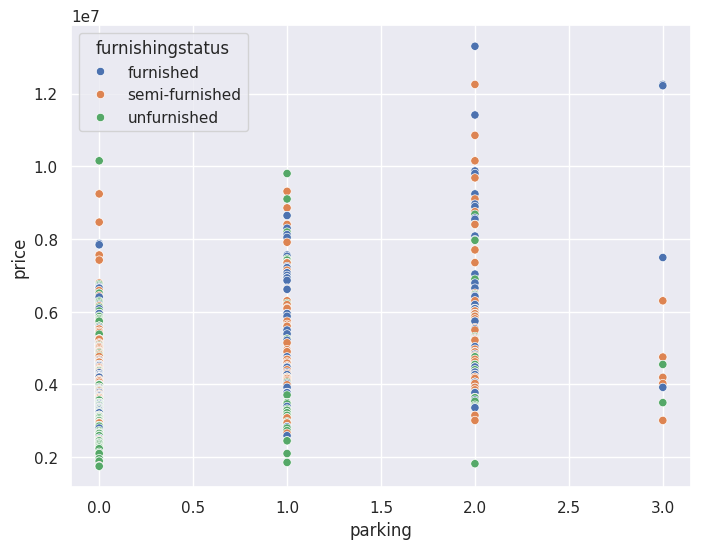

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = df['parking'],y =df['price'],hue=df['furnishingstatus'] )

<Axes: xlabel='furnishingstatus', ylabel='count'>

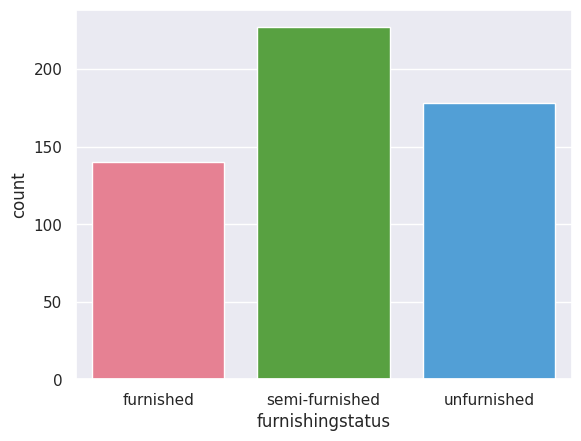

In [ ]:
sns.countplot(x = "furnishingstatus", data = df, palette = 'husl', )

In [ ]:
list(df)

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [ ]:
# Assuming 'y' is the column name of the target variable
target = 'price'
y = df[[target]]

# Assuming 'X' is the DataFrame containing the feature columns
features = df.drop(target, axis=1)
x = features

In [ ]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
x.shape

(545, 12)

In [ ]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
for col in x.columns:
    if x[col].dtypes == 'object' and x[col].nunique() > 2:
        x[col] = x[col].astype('category')
        x = pd.get_dummies(x, columns = [col], drop_first = True)

x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,yes,no,no,no,yes,2,yes,False,False
1,8960,4,4,4,yes,no,no,no,yes,3,no,False,False
2,9960,3,2,2,yes,no,yes,no,no,2,yes,True,False
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,False,False
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,False,False


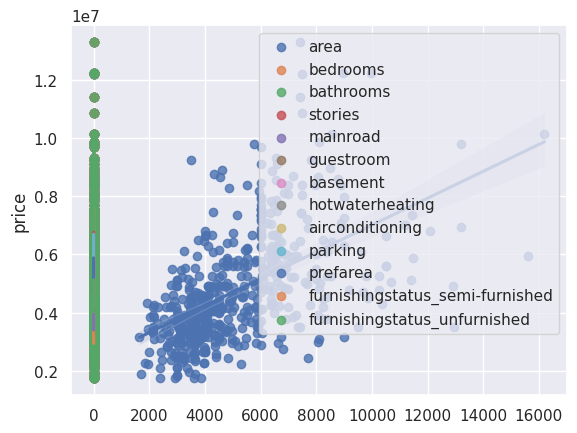

In [ ]:
for col in x.columns:
    sns.regplot(x=x[col], y=y, label = col)
    plt.xlabel('')
    plt.legend()

In [ ]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)

In [ ]:
sc_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-0.844888,-0.696429


In [ ]:
list(x)

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

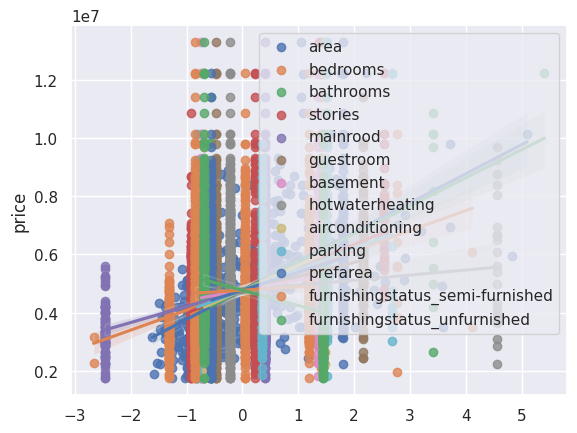

In [ ]:
sns.regplot(x=sc_x[0], y=y, label='area',)
sns.regplot(x=sc_x[1], y=y, label='bedrooms',)
sns.regplot(x=sc_x[2], y=y, label='bathrooms',)
sns.regplot(x=sc_x[3], y=y, label='stories',)
sns.regplot(x=sc_x[4], y=y, label='mainrood',)
sns.regplot(x=sc_x[5], y=y, label='guestroom',)
sns.regplot(x=sc_x[6], y=y, label='basement',)
sns.regplot(x=sc_x[7], y=y, label='hotwaterheating',)
sns.regplot(x=sc_x[8], y=y, label='airconditioning',)
sns.regplot(x=sc_x[9], y=y, label='parking',)
sns.regplot(x=sc_x[10], y=y, label='prefarea',)
sns.regplot(x=sc_x[11], y=y, label='furnishingstatus_semi-furnished',)
sns.regplot(x=sc_x[12], y=y, label='furnishingstatus_unfurnished',)
plt.xlabel('')
plt.legend()
plt.show()

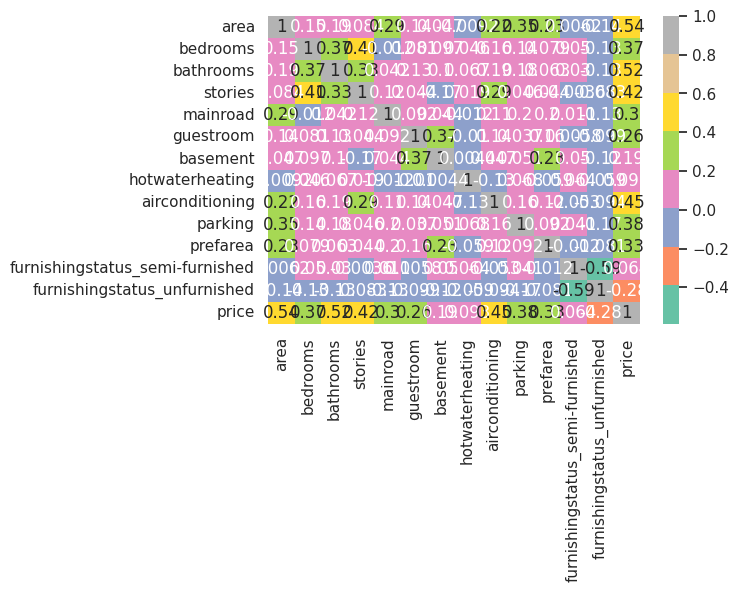

In [ ]:
# Finding correlation
plt.figure(figsize=(6,4))

# Combine the processed features (x) and the target variable (y) into a single DataFrame
# The 'x' DataFrame should already have all categorical columns encoded to numerical values.
df_corr = pd.concat([x, y], axis=1)

# Calculate the correlation matrix on the fully numerical DataFrame
corr = df_corr.corr()

sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()

In [67]:
vif

,VIF,Features
0,1.325250,area
1,1.369477,bedrooms
2,1.286621,bathrooms
3,1.478055,stories
4,1.172728,mainroad
5,1.212838,guestroom
6,1.323050,basement
7,1.041506,hotwaterheating
8,1.211840,airconditioning
9,1.212837,parking


In [77]:
# Split the data into training and test for building the model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(436, 13) (109, 13) (436, 1) (109, 1)


In [78]:
# Tain the model with LR model
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [79]:
# find the slopes and intercept from the trained model
intercept =LR.intercept_
slope =LR.coef_

print('The intercept for our linear model is :',intercept.round(3))
print()
print('The coefficients are :',slope.round(3))

The intercept for our linear model is : [68032.195]

The coefficients are : [[ 2.57754000e+02  1.08007914e+05  9.44798624e+05  4.86003364e+05
   3.84950040e+05  2.83418451e+05  3.90461504e+05  9.68215854e+05
   8.49619589e+05  2.71286057e+05  6.70042048e+05 -7.48711760e+04
  -4.99554482e+05]]


In [80]:
slope.shape

(1, 13)

In [81]:
slope

array([[ 2.57754260e+02,  1.08007914e+05,  9.44798624e+05,
         4.86003364e+05,  3.84950040e+05,  2.83418451e+05,
         3.90461504e+05,  9.68215854e+05,  8.49619589e+05,
         2.71286057e+05,  6.70042048e+05, -7.48711763e+04,
        -4.99554482e+05]])

In [83]:
#Reshaping of the slope is required from (1.5) to (5,1)
slope = slope.reshape(13,1)
print(slope.shape)

(13, 1)


In [84]:
Lr_data = {'Slope': slope,'Features' : x.columns}
coeff_df = pd.DataFrame(slope, columns=['Slope'], index =x.columns)
coeff_df

,Slope
area,257.754260
bedrooms,108007.914441
bathrooms,944798.623927
stories,486003.363994
mainroad,384950.040338
guestroom,283418.451182
basement,390461.504462
hotwaterheating,968215.854475
airconditioning,849619.589268
parking,271286.057240


In [85]:
#Training Prediction
y_pred_train = LR.predict(x_train)
err_train = y_train - y_pred_train
Train_r2 = r2_score(y_train, y_pred_train)

#Test Prediction
y_pred_test = LR.predict(x_test)
err_test = y_test - y_pred_test
Test_r2 = r2_score(y_test, y_pred_test)
print ('Train R2 score :', Train_r2,'\n' 'Test R2 Score   :', Test_r2)

Train R2 score : 0.6906711997536498 
Test R2 Score   : 0.6274471508217481


In [86]:
err_train.skew()

,0
price,1.000584


In [87]:
err_train.kurtosis()

,0
price,3.208779


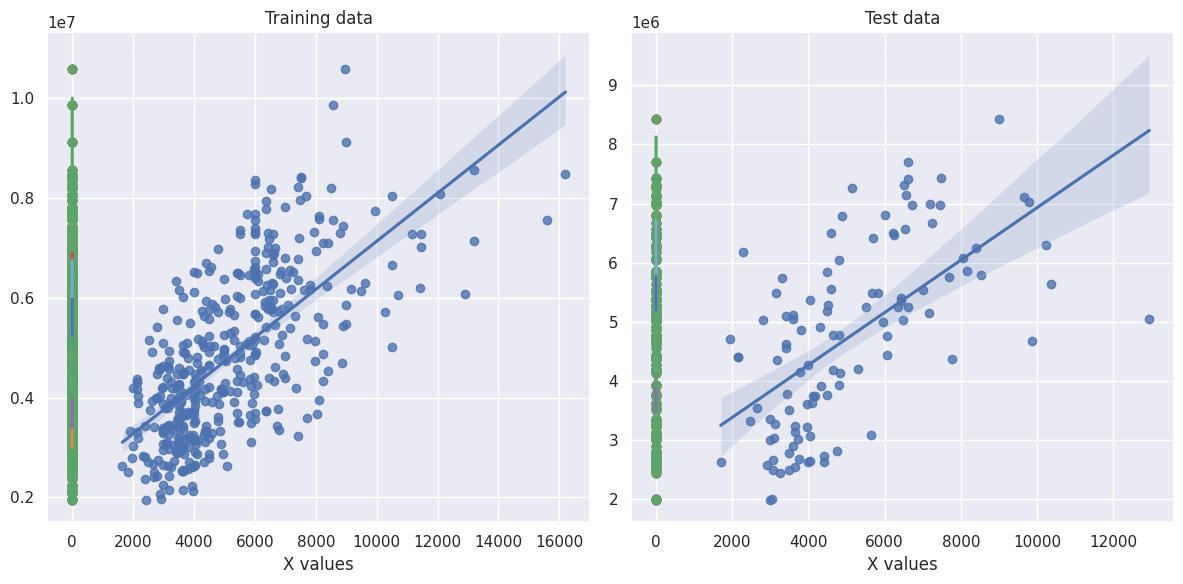

In [88]:
# Here we will loop through each feature and create a regression plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot regression for training data
for i in range(len(x_train.columns)):
    sns.regplot(x=x_train.iloc[:,i ], y=y_pred_train, ax=ax1, )
    ax1.set_title('Training data')
    ax1.set_xlabel('X values')


# Plot regression for test data
for i in range(len(x_test.columns)):
    sns.regplot(x=x_test.iloc[:, i], y=y_pred_test, ax=ax2)
    ax2.set_title('Test data')
    ax2.set_xlabel('X values')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [89]:
# mse, rmse, mape, accuracy, using formatted string literals

MSE = mean_squared_error(y_test,y_pred_test)
print(f'1. mean squared error (MSE) = ',MSE)
RMSE = np.sqrt(MSE)
print(f'2. root mean squared error (RMSE) = {RMSE}')
MAPE = mean_absolute_percentage_error(y_test,y_pred_test)
print(f'3. mean absolute percentage error (MAPE) = {MAPE}')
ACC = 100-MAPE*100
print(f'4. accuracy of the model = {ACC}')

1. mean squared error (MSE) =  1077603743001.8536
2. root mean squared error (RMSE) = 1038076.9446442078
3. mean absolute percentage error (MAPE) = 0.1972042776717597
4. accuracy of the model = 80.27957223282402
